In [1]:
import muon

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

In [2]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

In [3]:
mudata["rna"].obs.columns

Index(['sample', 'name', 'stage', 'stage_num', 'int_id', 'seq_id_gex_id',
       'seq_id_atac', 'reporter', 'experiment_batch', 'sequencing_batch',
       'n_counts', 'log_counts', 'n_counts_rank', 'n_genes', 'log_genes',
       'mt_frac', 'rp_frac', 'ambi_frac', 'final_doublets',
       'final_doublets_cat', 'doublet_calls', 'batch', 'size_factors',
       'leiden', 'leiden_05_rna', 'leiden_05_atac', 'leiden_1_rna',
       'leiden_1_atac', 'leiden_combined', 'leiden_gex_graph',
       'leiden_ATAC_graph', 'leiden_wnn_graph', 'cell_type',
       'cell_type_refined', 'S_score', 'G2M_score', 'phase', 'proliferation'],
      dtype='object')

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


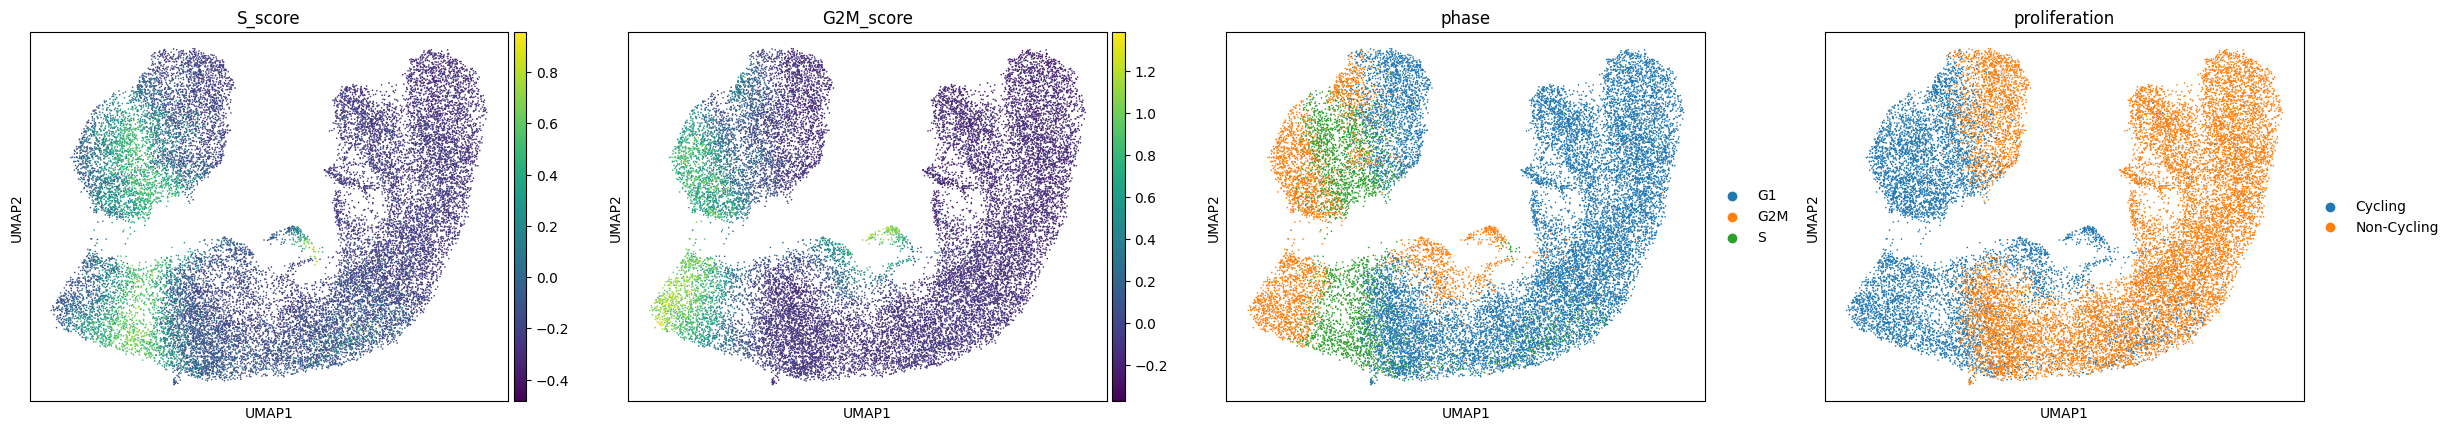

In [11]:
import scanpy as sc
sc.pl.umap(mudata["rna"], color=['S_score', 'G2M_score', 'phase', 'proliferation'])

In [12]:
mudata_filtered = mudata[mudata["rna"].obs["cell_type"].isin(("Ductal", "Prlf. Ductal"))]

In [23]:
adata = mudata["rna"]

In [14]:
x,y = 'stage', 'phase'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

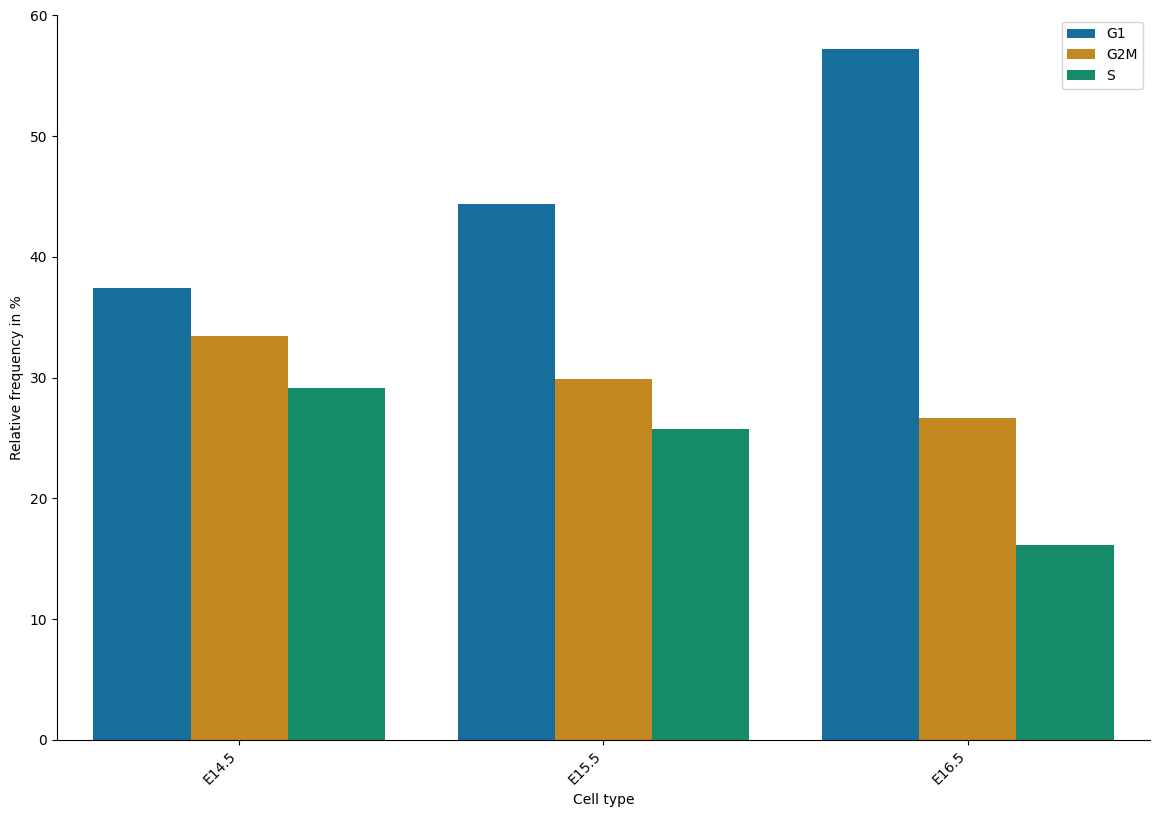

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="stage",y='percent',hue='phase',kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27, palette=sns.color_palette("colorblind", 3))


plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [7]:
from moscot.problems.time import TemporalProblem

In [4]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

In [4]:
adata = mudata["rna"]
adata.obsm["X_MultiVI"] = mudata.obsm["X_MultiVI"]

In [5]:
def adapt_time(x):
    if x["stage"]=="E14.5":
        return 14.5
    if x["stage"]=="E15.5":
        return 15.5
    if x["stage"]=="E16.5":
        return 16.5
    raise ValueError

adata.obs['time'] = adata.obs.apply(adapt_time, axis=1).astype("category")

In [16]:
adata = adata[adata.obs["proliferation"]=="Cycling"]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [17]:
adata.shape

(7565, 20242)

In [18]:
tp = TemporalProblem(adata)

In [19]:
tp = tp.prepare("time")

INFO     Ordering Index(['AAACAGCCACCTGTAA-1', 'AAACATGCACTAGGTC-1', 'AAACCAACAGCAACAG-1',                         
                'AAACCAACATCGCTCC-1', 'AAACCAACATTAAGCT-1', 'AAACCGAAGCATGTCG-1',                                  
                'AAACCGAAGTGAACAG-1', 'AAACCGCGTTCGCTTG-1', 'AAACCGCGTTTCGCCA-1',                                  
                'AAACCGGCAGGAACAT-1',                                                                              
                ...                                                                                                
                'TTTCATCAGGAGCATA-4', 'TTTCGTCCATTAAGCT-4', 'TTTCTTGCAATCCTGA-4',                                  
                'TTTGCATTCCTAGTAA-4', 'TTTGCGACACCCTCAC-4', 'TTTGCGGAGGTCATTA-4',                                  
                'TTTGGTGCAAACCTTG-4', 'TTTGTCTAGCAAGGAC-4', 'TTTGTGTTCCCTGGTT-4',                                  
                'TTTGTTGGTAGGTGTC-4'],                                  

/home/icb/dominik.klein/git_repos/moscot/src/moscot/problems/time/_mixins.py:986: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not (is_categorical_dtype(col) and is_numeric_dtype(col.cat.categories)):


INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [20]:
tp = tp.solve()

INFO     Solving `2` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(3438, 559)].                                   
WARNING  Solver did not converge                                                                                   
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(3568, 3438)].                                  
WARNING  Solver did not converge                                                                                   


In [24]:
adata.obs["phase"].value_counts()

phase
G1     15039
G2M     4080
S       3485
Name: count, dtype: int64

In [22]:
tp.cell_transition(14.5, 15.5, "phase", "phase", forward=True)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning:

,G2M,S
G2M,0.800082,0.199918
S,0.266473,0.733527


In [14]:
tp.cell_transition(15.5, 16.5, "phase", "phase", forward=True)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning:

,G1,G2M,S
G1,0.962482,0.018918,0.018599
G2M,0.452488,0.413194,0.134318
S,0.655563,0.160197,0.184239


In [3]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/all_cells_TemporalProblem.pkl")

ModuleNotFoundError: No module named 'moscot.solvers'

In [ ]:
tp0.cell_transition(14.5, 15.5, "phase", "phase")